# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [4]:
# Import required libraries
import pandas as pd
from google.colab import files

# Load the dataset
data = pd.read_csv("marketing.csv")

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Check the shape of the dataset
print("\nShape of the dataset:")
print(data.shape)

# Display dataset information
print("\nDataset information:")
print(data.info())


First 5 rows of the dataset:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0    4/9/2012       58       635  ...                   10                  4   
1    8/3/2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3   10/2/2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisits

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
print(missing_info)

# Handling missing values
high_missing_columns = missing_info[missing_info['Percentage (%)'] > 50].index
data = data.drop(columns=high_missing_columns)

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

print(data.info())


                     Missing Values  Percentage (%)
ID                                0        0.000000
Year_Birth                        0        0.000000
Education                         0        0.000000
Marital_Status                    0        0.000000
Income                           24        1.071429
Kidhome                           0        0.000000
Teenhome                          0        0.000000
Dt_Customer                       0        0.000000
Recency                           0        0.000000
MntWines                          0        0.000000
MntFruits                         0        0.000000
MntMeatProducts                   0        0.000000
MntFishProducts                   0        0.000000
MntSweetProducts                  0        0.000000
MntGoldProds                      0        0.000000
NumDealsPurchases                 0        0.000000
NumWebPurchases                   0        0.000000
NumCatalogPurchases               0        0.000000
NumStorePurc

<ipython-input-5-6f6d7a78d9c7>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-5-6f6d7a78d9c7>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [6]:
# Check for duplicate records
duplicates = data.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

# Drop duplicate records if any
data = data.drop_duplicates()

# Verify the dataset after removing duplicates
print(f"Shape of dataset after removing duplicates: {data.shape}")


Number of duplicate records: 0
Shape of dataset after removing duplicates: (2240, 27)


### 5. Drop the columns which you think redundant for the analysis

In [7]:
# Drop columns that are redundant for analysis
columns_to_drop = ['ID', 'Dt_Customer']  # Example redundant columns
data = data.drop(columns=columns_to_drop)

# Verify the dataset after dropping columns
print(f"Shape of dataset after dropping redundant columns: {data.shape}")


Shape of dataset after dropping redundant columns: (2240, 25)


### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [8]:
# Check unique categories in the column 'Marital_Status'
unique_categories = data['Marital_Status'].unique()
print(f"Unique categories in 'Marital_Status': {unique_categories}")

# Group categories into 'relationship' and 'Single'
data['Marital_Status'] = data['Marital_Status'].replace(
    {'Married': 'relationship', 'Together': 'relationship',
     'Divorced': 'Single', 'Widow': 'Single',
     'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single'}
)

# Verify the updated categories
updated_categories = data['Marital_Status'].unique()
print(f"Updated categories in 'Marital_Status': {updated_categories}")


Unique categories in 'Marital_Status': ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Updated categories in 'Marital_Status': ['Single' 'relationship']


### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [9]:
# Group the specified columns into 'Total_Expenses'
data['Total_Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + \
                         data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# Drop the individual columns after grouping
data = data.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

# Verify the dataset after creating 'Total_Expenses'
print(data.head())


   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957  Graduation         Single  58138.0        0         0       58   
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation   relationship  71613.0        0         0       26   
3        1984  Graduation   relationship  26646.0        1         0       26   
4        1981         PhD   relationship  58293.0        1         0       94   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  Acce

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [10]:
# Group the specified columns into 'Num_Total_Purchases'
data['Num_Total_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + \
                              data['NumStorePurchases'] + data['NumDealsPurchases']

# Drop the individual columns after grouping
data = data.drop(columns=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'])

# Verify the dataset after creating 'Num_Total_Purchases'
print(data.head())


   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957  Graduation         Single  58138.0        0         0       58   
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation   relationship  71613.0        0         0       26   
3        1984  Graduation   relationship  26646.0        1         0       26   
4        1981         PhD   relationship  58293.0        1         0       94   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Respo

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [11]:
# Group the columns 'Kidhome' and 'Teenhome' as 'Kids'
data['Kids'] = data['Kidhome'] + data['Teenhome']

# Drop the individual columns after grouping
data = data.drop(columns=['Kidhome', 'Teenhome'])

# Verify the dataset after creating 'Kids'
print(data.head())


   Year_Birth   Education Marital_Status   Income  Recency  NumWebVisitsMonth  \
0        1957  Graduation         Single  58138.0       58                  7   
1        1954  Graduation         Single  46344.0       38                  5   
2        1965  Graduation   relationship  71613.0       26                  4   
3        1984  Graduation   relationship  26646.0       26                  6   
4        1981         PhD   relationship  58293.0       94                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  Total_Expenses  Num_Total_Purchases  Ki

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [12]:
# Group the columns 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', and 'Response' as 'TotalAcceptedCmp'
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + \
                           data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

# Drop the individual columns after grouping
data = data.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'])

# Verify the dataset after creating 'TotalAcceptedCmp'
print(data.head())


   Year_Birth   Education Marital_Status   Income  Recency  NumWebVisitsMonth  \
0        1957  Graduation         Single  58138.0       58                  7   
1        1954  Graduation         Single  46344.0       38                  5   
2        1965  Graduation   relationship  71613.0       26                  4   
3        1984  Graduation   relationship  26646.0       26                  6   
4        1981         PhD   relationship  58293.0       94                  5   

   Complain  Total_Expenses  Num_Total_Purchases  Kids  TotalAcceptedCmp  
0         0            1617                   25     0                 1  
1         0              27                    6     2                 0  
2         0             776                   21     0                 0  
3         0              53                    8     1                 0  
4         0             422                   19     1                 0  


### 11. Drop those columns which we have used above for obtaining new features

In [13]:
# The columns have already been dropped in the previous steps where new features were created.
# Verify the remaining columns in the dataset
print("Remaining columns in the dataset:")
print(data.columns)


Remaining columns in the dataset:
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumWebVisitsMonth', 'Complain', 'Total_Expenses',
       'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp'],
      dtype='object')


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [14]:
# Calculate 'age' from 'Year_Birth'
data['Age'] = 2024 - data['Year_Birth']  # Use the current year

# Drop the 'Year_Birth' column
data = data.drop(columns=['Year_Birth'])

# Verify the dataset after creating 'Age'
print(data.head())


    Education Marital_Status   Income  Recency  NumWebVisitsMonth  Complain  \
0  Graduation         Single  58138.0       58                  7         0   
1  Graduation         Single  46344.0       38                  5         0   
2  Graduation   relationship  71613.0       26                  4         0   
3  Graduation   relationship  26646.0       26                  6         0   
4         PhD   relationship  58293.0       94                  5         0   

   Total_Expenses  Num_Total_Purchases  Kids  TotalAcceptedCmp  Age  
0            1617                   25     0                 1   67  
1              27                    6     2                 0   70  
2             776                   21     0                 0   59  
3              53                    8     1                 0   40  
4             422                   19     1                 0   43  


### 13. Encode the categorical variables in the dataset

In [15]:
# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Verify the dataset after encoding
print(data.head())


    Income  Recency  NumWebVisitsMonth  Complain  Total_Expenses  \
0  58138.0       58                  7         0            1617   
1  46344.0       38                  5         0              27   
2  71613.0       26                  4         0             776   
3  26646.0       26                  6         0              53   
4  58293.0       94                  5         0             422   

   Num_Total_Purchases  Kids  TotalAcceptedCmp  Age  Education_Basic  \
0                   25     0                 1   67            False   
1                    6     2                 0   70            False   
2                   21     0                 0   59            False   
3                    8     1                 0   40            False   
4                   19     1                 0   43            False   

   Education_Graduation  Education_Master  Education_PhD  \
0                  True             False          False   
1                  True             Fa

### 14. Standardize the columns, so that values are in a particular range

In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the numerical columns
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Verify the standardized dataset
print(data_scaled.head())


     Income   Recency  NumWebVisitsMonth  Complain  Total_Expenses  \
0  0.235327  0.307039           0.693904 -0.097282        1.679417   
1 -0.235826 -0.383664          -0.130463 -0.097282       -0.961275   
2  0.773633 -0.798086          -0.542647 -0.097282        0.282673   
3 -1.022732 -0.798086           0.281720 -0.097282       -0.918094   
4  0.241519  1.550305          -0.130463 -0.097282       -0.305254   

   Num_Total_Purchases      Kids  TotalAcceptedCmp       Age  Education_Basic  \
0             1.320826 -1.264505          0.621248  0.985345        -0.157171   
1            -1.154596  1.396361         -0.501912  1.235733        -0.157171   
2             0.799685 -1.264505         -0.501912  0.317643        -0.157171   
3            -0.894025  0.065928         -0.501912 -1.268149        -0.157171   
4             0.539114  0.065928         -0.501912 -1.017761        -0.157171   

   Education_Graduation  Education_Master  Education_PhD  \
0              0.993769         

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

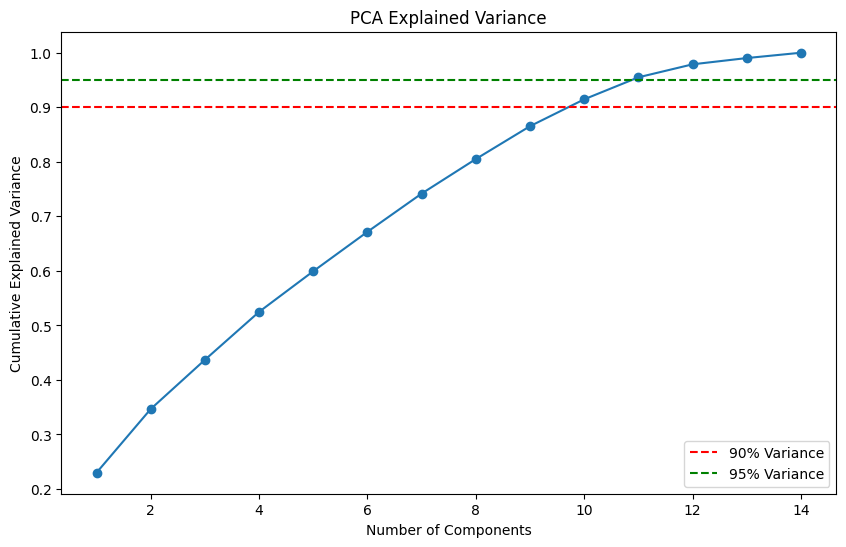

Number of components to retain 90% variance: 10


In [17]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(data_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components for 90-95% variance
num_components = np.argmax(cumulative_variance >= 0.90) + 1

# Plot cumulative explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.legend()
plt.show()

print(f"Number of components to retain 90% variance: {num_components}")


### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

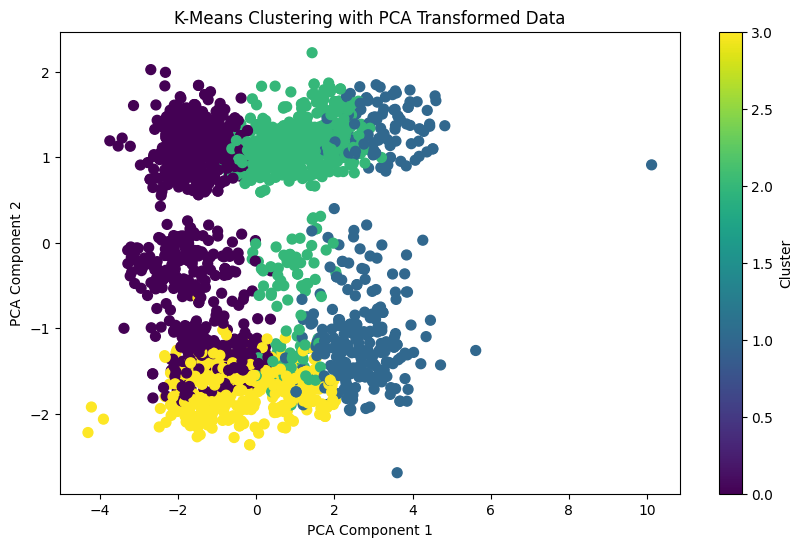

In [18]:
from sklearn.cluster import KMeans

# Use PCA-transformed data with optimal number of components
pca = PCA(n_components=num_components)
pca_transformed_data = pca.fit_transform(data_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)  # Adjust 'n_clusters' as needed
kmeans_labels = kmeans.fit_predict(pca_transformed_data)

# Add cluster labels to the dataset
data_scaled['Cluster'] = kmeans_labels

# Visualize the clusters using the first two PCA components
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering with PCA Transformed Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

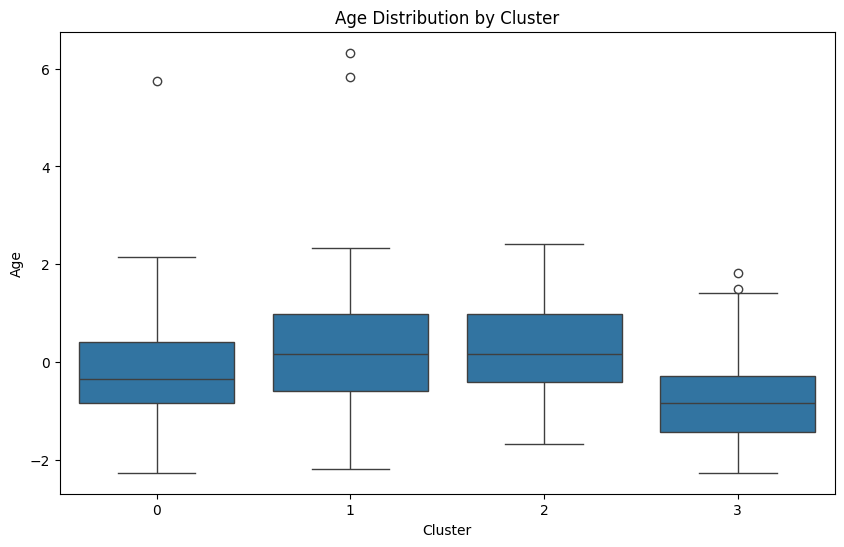

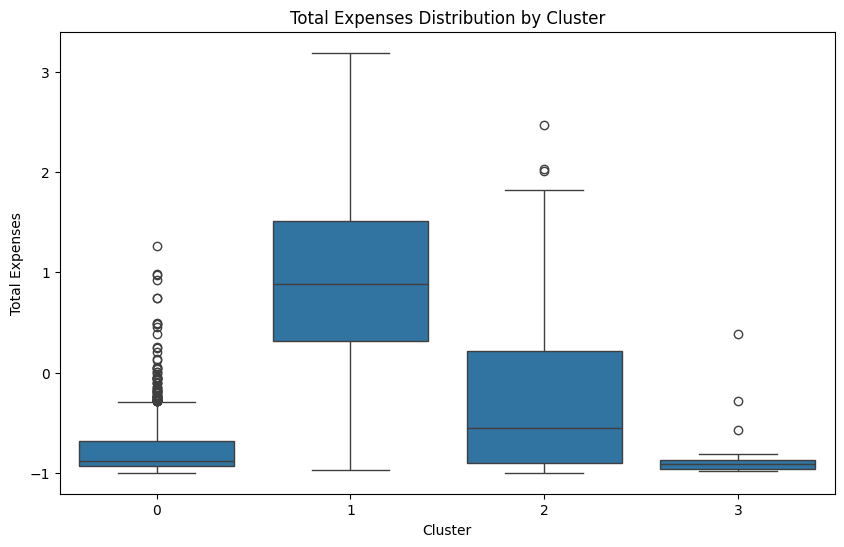

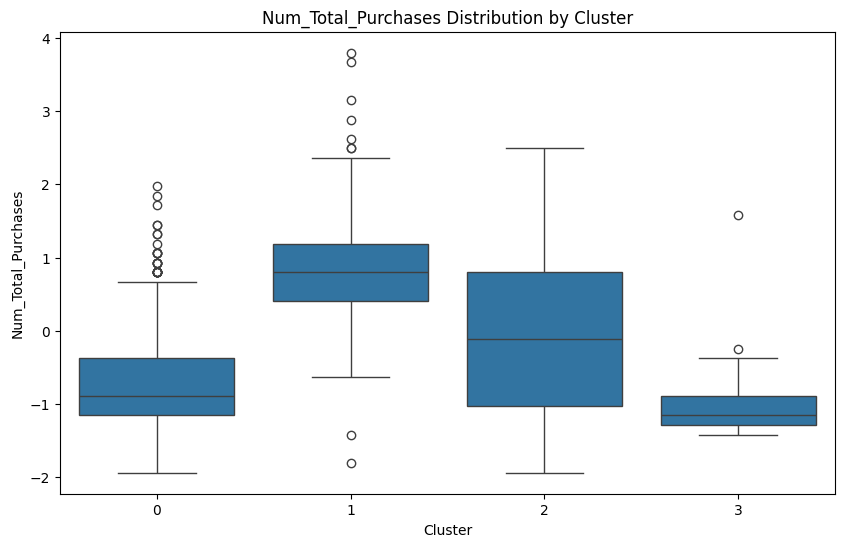

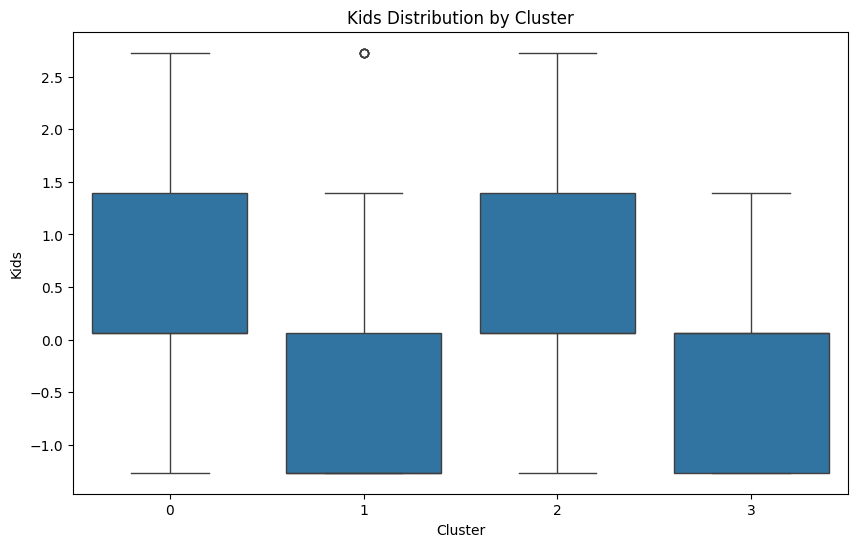

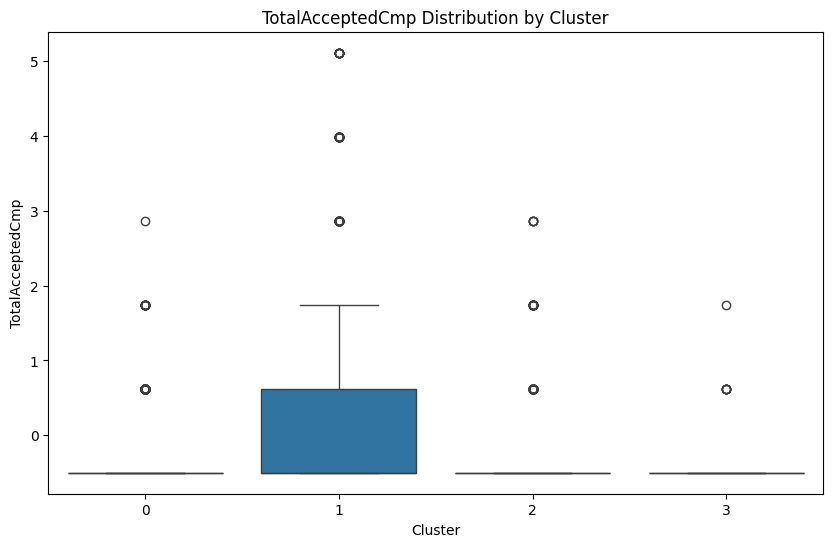

In [19]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

# Apply Agglomerative Clustering
agglo_clustering = AgglomerativeClustering(n_clusters=4)  # Adjust 'n_clusters' as needed
agglo_labels = agglo_clustering.fit_predict(data_scaled)

# Add cluster labels to the dataset
data_scaled['Cluster_Agglo'] = agglo_labels

# Perform bivariate analysis: example with 'Age' and 'Total_Expenses'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_Agglo', y='Age', data=data_scaled)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_Agglo', y='Total_Expenses', data=data_scaled)
plt.title('Total Expenses Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Expenses')
plt.show()

# Bivariate analysis for other features
features = ['Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp']  # Add features of interest
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster_Agglo', y=feature, data=data_scaled)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()


### Visualization and Interpretation of results

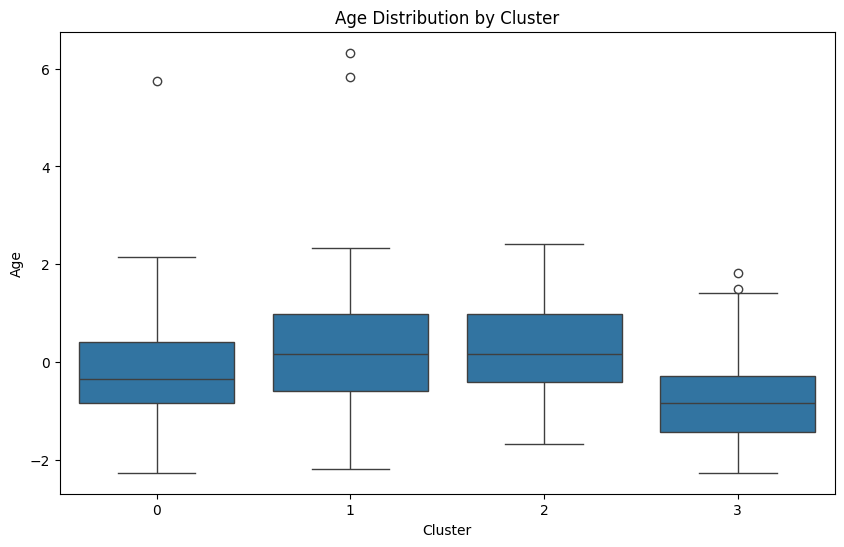

<Figure size 1000x600 with 0 Axes>

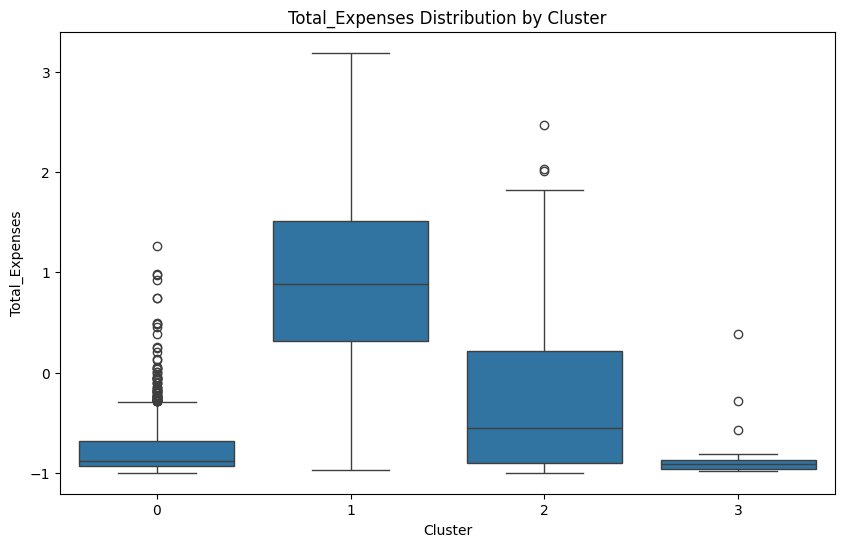

<Figure size 1000x600 with 0 Axes>

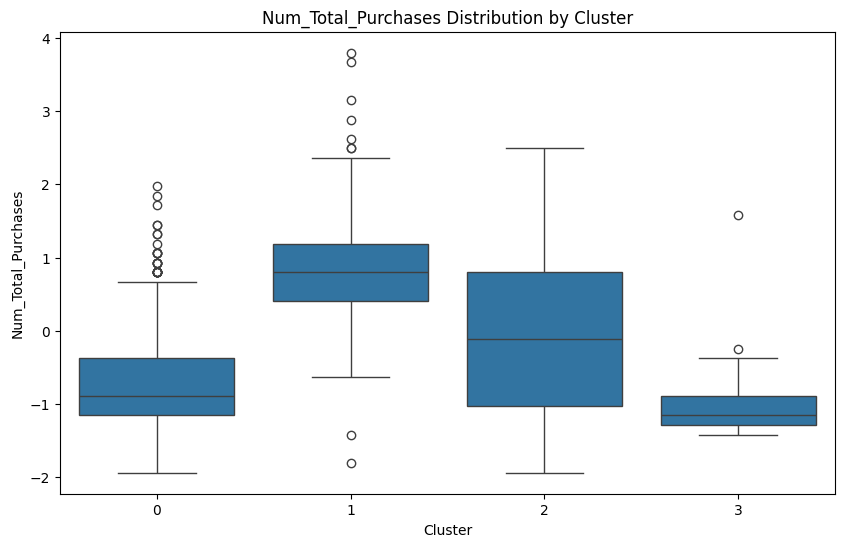

<Figure size 1000x600 with 0 Axes>

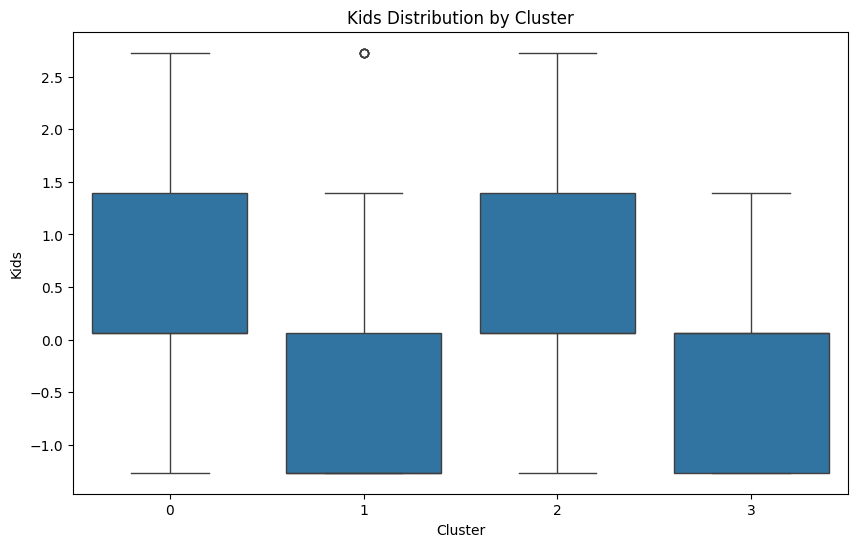

<Figure size 1000x600 with 0 Axes>

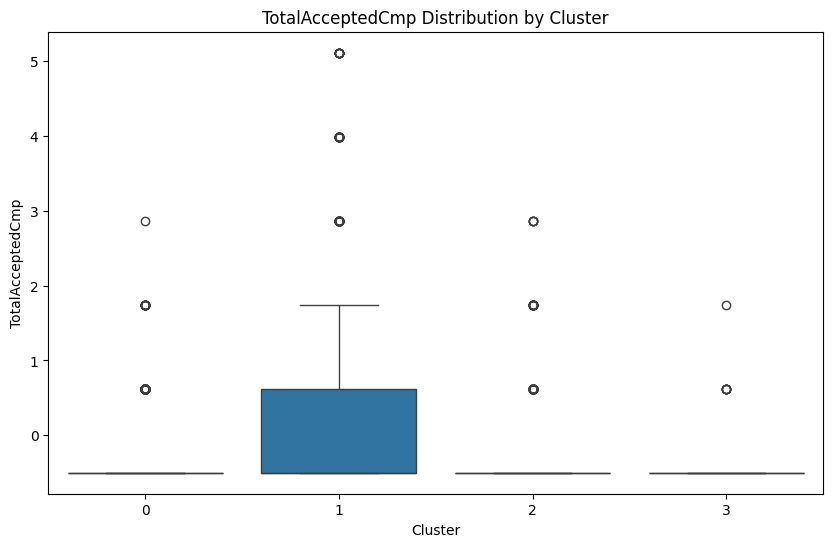

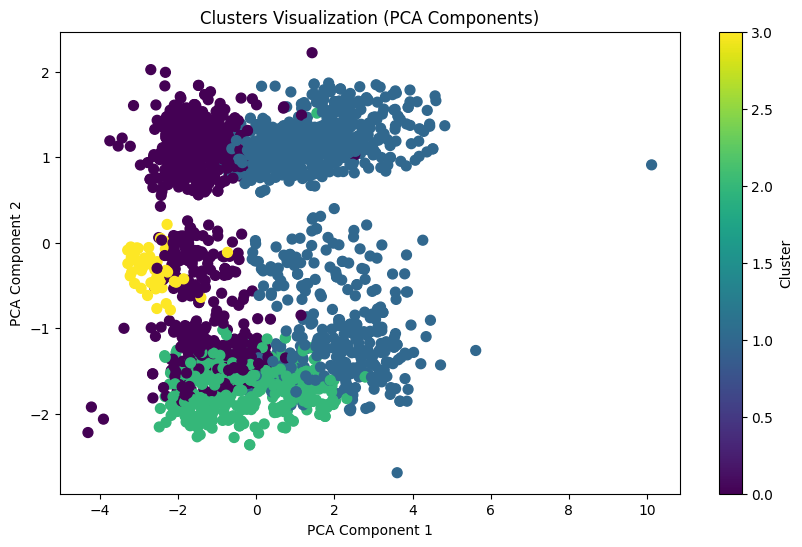

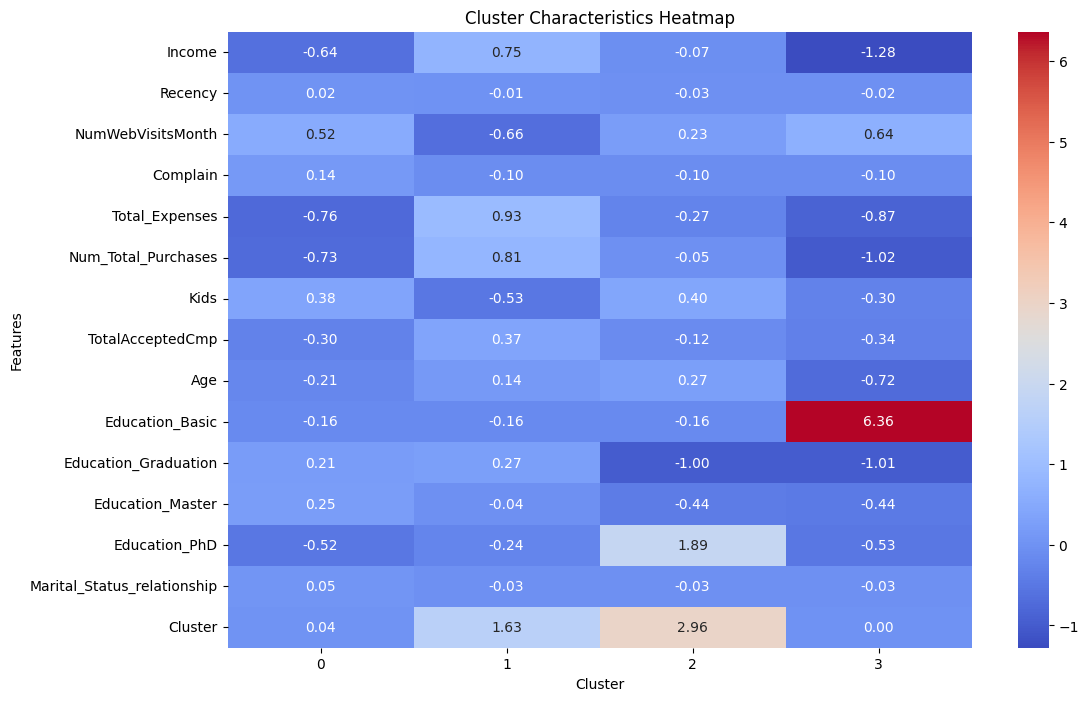

In [22]:
features_to_analyze = ['Age', 'Total_Expenses', 'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp']

for feature in features_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster_Agglo', y=feature, data=data_scaled)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

    plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=agglo_labels, cmap='viridis', s=50)
plt.title('Clusters Visualization (PCA Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


cluster_means = data_scaled.groupby('Cluster_Agglo').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Cluster Characteristics Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()



-----
## Happy Learning
-----